## Question #1 

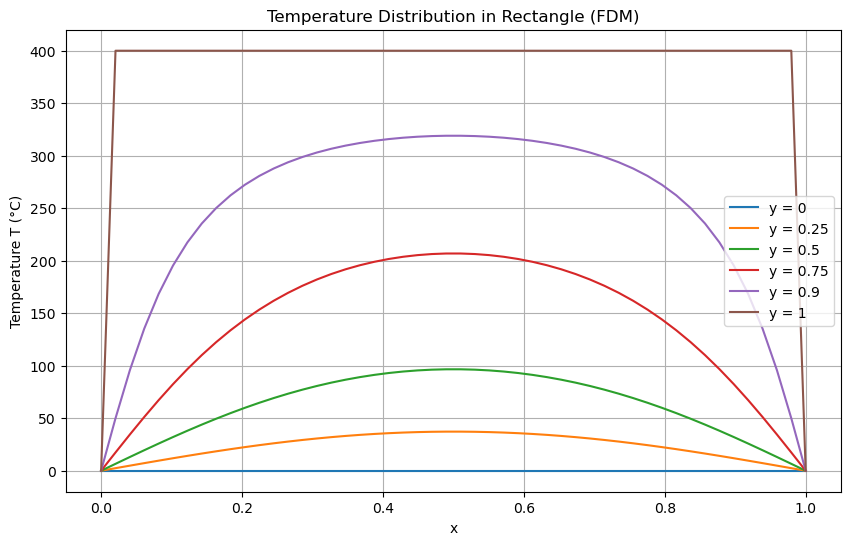

Temperature at x=0.6 and y=0.4: 64.88 °C


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx = 1.0  # Length in x direction
Ly = 1.0  # Length in y direction
Nx = 50  # Number of grid points in x direction
Ny = 50  # Number of grid points in y direction
dx = Lx / (Nx - 1)  # Grid spacing in x
dy = Ly / (Ny - 1)  # Grid spacing in y
tolerance = 1e-5  # Convergence tolerance

# Boundary conditions
T_top = 400  # Temperature at the top boundary (y=1)
T_bottom = 0  # Temperature at the bottom boundary (y=0)
T_left = 0  # Temperature at the left boundary (x=0)
T_right = 0  # Temperature at the right boundary (x=1)

# Initialize temperature grid
T = np.zeros((Nx, Ny))

# Set boundary conditions
T[:, -1] = T_top  # Top boundary (y=1)
T[:, 0] = T_bottom  # Bottom boundary (y=0)
T[0, :] = T_left  # Left boundary (x=0)
T[-1, :] = T_right  # Right boundary (x=1)

# Finite difference iteration (Gauss-Seidel method)
def solve_steady_state(T, dx, dy, tolerance):
    error = 1
    while error > tolerance:
        T_old = T.copy()
        # Update the internal points using the finite difference approximation
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                T[i, j] = 0.5 * ((T[i+1, j] + T[i-1, j]) * dy**2 + (T[i, j+1] + T[i, j-1]) * dx**2) / (dx**2 + dy**2)
        # Compute the maximum error
        error = np.max(np.abs(T - T_old))
    return T

# Solve for steady-state temperature distribution
T = solve_steady_state(T, dx, dy, tolerance)

# Plot temperature distribution at different y values
x_values = np.linspace(0, Lx, Nx)
y_values = [0, 0.25, 0.50, 0.75, 0.9, 1]
y_indices = [int(y * (Ny-1)) for y in y_values]

plt.figure(figsize=(10, 6))
for y_idx, y in zip(y_indices, y_values):
    plt.plot(x_values, T[:, y_idx], label=f'y = {y}')
    
plt.xlabel('x')
plt.ylabel('Temperature T (°C)')
plt.title('Temperature Distribution in Rectangle (FDM)')
plt.legend()
plt.grid(True)
plt.show()

# Find the temperature at x = 0.6, y = 0.4
x_idx = int(0.6 * (Nx-1))
y_idx = int(0.4 * (Ny-1))
T_specific = T[x_idx, y_idx]
print(f"Temperature at x=0.6 and y=0.4: {T_specific:.2f} °C")


## Question #2

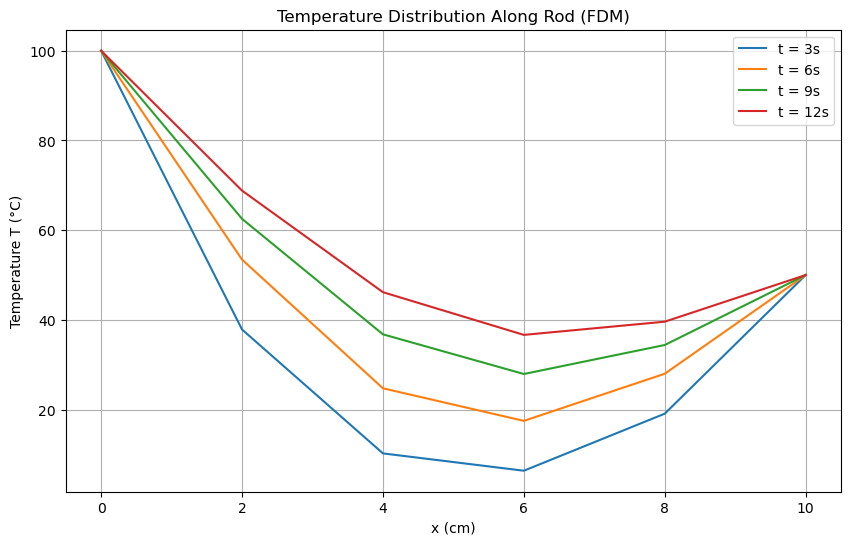

Temperature at x=2 cm and t=9 s: 62.52 °C


In [6]:
# Q2: Transient heat conduction in a rod
def rod_temperature_distribution(L, dx, dt, t_max, k, T_left, T_right):
    nx = int(L / dx) + 1
    nt = int(t_max / dt) + 1
    
    # Initialize temperature array
    T = np.zeros((nx, nt))
    
    # Set boundary conditions
    T[0, :] = T_left
    T[-1, :] = T_right
    
    alpha = k * dt / dx**2  # Stability parameter
    
    # Compute temperature distribution using explicit FDM
    for n in range(0, nt-1):
        for i in range(1, nx-1):
            T[i, n+1] = T[i, n] + alpha * (T[i+1, n] - 2*T[i, n] + T[i-1, n])
    
    return T

# Parameters
L = 10  # cm
dx = 2  # cm
dt = 0.1  # s
t_max = 12  # s
k = 0.835  # cm^2/s
T_left = 100  # °C
T_right = 50  # °C

# Compute temperature distribution
T = rod_temperature_distribution(L, dx, dt, t_max, k, T_left, T_right)

# Plot temperature T w.r.t x for t = 3, 6, 9, 12
x_values = np.linspace(0, L, int(L/dx) + 1)
t_plot = [3, 6, 9, 12]

plt.figure(figsize=(10, 6))
for t in t_plot:
    t_index = int(t / dt)
    plt.plot(x_values, T[:, t_index], label=f't = {t}s')

plt.xlabel('x (cm)')
plt.ylabel('Temperature T (°C)')
plt.title('Temperature Distribution Along Rod (FDM)')
plt.legend()
plt.grid(True)
plt.show()

# Find the value of T at x = 2 cm and t = 9 s
x_index = int(2 / dx)
t_index = int(9 / dt)
T_specific_rod = T[x_index, t_index]
print(f"Temperature at x=2 cm and t=9 s: {T_specific_rod:.2f} °C")
